# Exercise Sheet 6
Leon Oleschko and Aurel Müller-Schoenau

4 Feb. 2023

In [1]:
# imports

from mpmath import mp
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## Exercise 1: Random Numbers

Implement the following pseudo random number generators:

- Linear congruential generator:

$$ x_{n+1} = (a x_n + b) \text{ mod } m $$

with $m = 2^{31}, \, a = 65539, \, b = 0$

- Same as above, but with parameters $a = 1103515245, \, b = 12345$

- Decimal places of Pi

- Pythons standard PRNG `random()`

In [2]:
# Linear Congruential Generator

# want to create LCG as an object that stores its own parameters
class LCG:

    m, a, b = 1, 0, 0
    x_n = 1
    name = ""

    # save parameters on initialization of the object
    def __init__(self, m, a, b):
        self.m, self.a, self.b = m, a, b
        self.name = "Linear Congruential Generator with parameters m = {}".format(self.m) + "  a = {}".format(self.a) + "  b = {}".format(self.b)

    # update x_n inside the object and return the value as well
    def iterate(self):
        self.x_n = (self.a * self.x_n + self.b) % self.m
        return self.x_n

    def reset(self):
        self.x_n = 1


# Decimal Places of Pi:
class PI_PRNG:
    name = "Decimal Places of Pi"
    decimal_places = 3
    pi_string = ""
    index = 0

    def __init__(self, rand_list_length):
        self.decimal_places = rand_list_length + 2
        mp.dps = self.decimal_places
        self.pi_string = str(mp.pi)[2:]

    # return array element and increment index counter
    def iterate(self):
        x_n = ord(self.pi_string[self.index]) - 48
        self.index += 1
        return x_n

    def reset(self):
        self.index = 0

# wrapper for pythons random()

class PYTHON_PRNG:

    name = "Python included PRNG (random.random())"

    def iterate():
        return random.random()

    def reset():
        pass



### b)

Calculate $\langle z_i \rangle$ and $\langle z_i z_{i+1} \rangle$ for $N = 100, 10000, 1000000$

In [3]:
# define object arrray
N_vals = [100, 10000, 1000000]
PRNGs = [LCG(1 << 31, 65539, 0), LCG(1 << 31, 1103515245, 12345), PI_PRNG(max(N_vals)), PYTHON_PRNG]


# iterate over PRNGs

for PRNG in PRNGs:
    print("PRNG used: " + PRNG.name + "\n")

    for N in N_vals:
        PRNG.reset()
        z_2 = 0
        sum_1, sum_2 = 0, 0

        for i in range(0,N):
            z_1 = z_2
            z_2 = PRNG.iterate()
            sum_1 += z_2
            sum_2 += z_1 * z_2

        sum_1 /= N
        sum_2 /= N

        print(" N = {}".format(N) + "   <z_i> = {}".format(sum_1) + "     <z_i z_i+1> = {}".format(sum_2))

    print("\n")





PRNG used: Linear Congruential Generator with parameters m = 2147483648  a = 65539  b = 0

 N = 100   <z_i> = 1162442254.64     <z_i z_i+1> = 1.4162438686512435e+18
 N = 10000   <z_i> = 1074091363.6576     <z_i z_i+1> = 1.1586893812987062e+18
 N = 1000000   <z_i> = 1073016800.966528     <z_i z_i+1> = 1.1511761121112956e+18


PRNG used: Linear Congruential Generator with parameters m = 2147483648  a = 1103515245  b = 12345

 N = 100   <z_i> = 1107005206.86     <z_i z_i+1> = 1.2115795907424364e+18
 N = 10000   <z_i> = 1079143767.5352     <z_i z_i+1> = 1.1639167630603164e+18
 N = 1000000   <z_i> = 1074608690.091104     <z_i z_i+1> = 1.1542988182417472e+18


PRNG used: Decimal Places of Pi

 N = 100   <z_i> = 4.77     <z_i z_i+1> = 22.55
 N = 10000   <z_i> = 4.4894     <z_i z_i+1> = 20.0619
 N = 1000000   <z_i> = 4.499934     <z_i z_i+1> = 20.237949


PRNG used: Python included PRNG (random.random())

 N = 100   <z_i> = 0.5272665862239306     <z_i z_i+1> = 0.27329026994370226
 N = 10000   

### c)

For the cases looked at in part b), find out if $\langle z_i z_{i+1} \rangle = \langle z_i\rangle \langle z_{i+1} \rangle$

In [4]:
N = max(N_vals)
test_threshold = 0.001

for PRNG in PRNGs:
    PRNG.reset()

    print("PRNG examined: " + PRNG.name + "\n")

    z_2 = 0
    sum_1, sum_2, sum_3 = 0, 0, 0

    for i in range(0,N):
        z_1 = z_2
        z_2 = PRNG.iterate()
        sum_1 += z_2
        sum_2 += z_1
        sum_3 += z_1 * z_2

    sum_1 /= N
    sum_2 /= N
    sum_3 /= N

    product = sum_1 * sum_2
    diff = product - sum_3
    err_rel = abs(diff/sum_3)

    print("<z_i> = {}".format(sum_1) + "  <z_i+1> = {}".format(sum_2))
    print("<z_i><z_i+1> - <z_i z_i+1> = {}".format(product) + " - {}".format(sum_3) + " = {}".format(diff))
    if err_rel < test_threshold:
        print("Difference / <z_i z_i+1> = {} ~> Test passed!\n\n".format(err_rel))
    else:
        print("Difference / <z_i z_i+1> = {} ~> Test FAILED!!!\n\n".format(err_rel))

PRNG examined: Linear Congruential Generator with parameters m = 2147483648  a = 65539  b = 0

<z_i> = 1073016800.966528  <z_i+1> = 1073015072.805503
<z_i><z_i+1> - <z_i z_i+1> = 1.1513632008106271e+18 - 1.1511761121112956e+18 = 187088699331456.0
Difference / <z_i z_i+1> = 0.00016251961568966981 ~> Test passed!


PRNG examined: Linear Congruential Generator with parameters m = 2147483648  a = 1103515245  b = 12345

<z_i> = 1074608690.091104  <z_i+1> = 1074608344.289439
<z_i><z_i+1> - <z_i z_i+1> = 1.1547834652178442e+18 - 1.1542988182417472e+18 = 484646976097024.0
Difference / <z_i z_i+1> = 0.0004198626633225257 ~> Test passed!


PRNG examined: Decimal Places of Pi

<z_i> = 4.499934  <z_i+1> = 4.499933
<z_i><z_i+1> - <z_i z_i+1> = 20.249401504422 - 20.237949 = 0.011452504421999521
Difference / <z_i z_i+1> = 0.0005658925428658567 ~> Test passed!


PRNG examined: Python included PRNG (random.random())

<z_i> = 0.500120619966051  <z_i+1> = 0.5001197900252916
<z_i><z_i+1> - <z_i z_i+1> = 0

As expected, $\langle z_i \rangle$ is almost the same as $\langle z_{i+1} \rangle$.
All methods examined yielded relative errors of diff $/\langle z_i z_{i+1} \rangle$ smaller than our arbitrary threshold of $0.001$. The result of Python's own PRNG lies in a similar range.

## Exercise 2: Monte-Carlo Integration

We will take a look at the volume of the $n$-dimensional ball. Firstly, define methods for integration and for the density of the ball:

In [3]:
# Monte Carlo Integration

def integrate_mc(function, NUMBER_OF_POINTS, dim):
    x = np.zeros(dim)
    result = 0

    rng = np.random.default_rng()
    x_vals = rng.random(size=(dim,NUMBER_OF_POINTS))
    result = np.sum(function(x_vals))

    return result / NUMBER_OF_POINTS # because we are looking at volume V([0,1]^n) = 1


def ball_fun(x):
    x = x*x
    sum = np.sum(x, axis=0)
    return [sum <= 1]


### a)

- Find the volume of a circle and compare to the real value

In [3]:
number_points = round(1e7) # number of random points for integration

circle_area_mc = 4 * integrate_mc(ball_fun, number_points, 2) # 4* because we only integrate one quadrant

print("Circle area according to Monte-Carlo Method: {}".format(circle_area_mc))
print("The analytical result is pi")
print("Proportion Calculated Area / Analytical: {}".format(circle_area_mc / np.pi))

Circle area according to Monte-Carlo Method: 3.141198
The analytical result is pi
Proportion Calculated Area / Analytical: 0.999874377860751


- Compare the result for different numbers of integration points

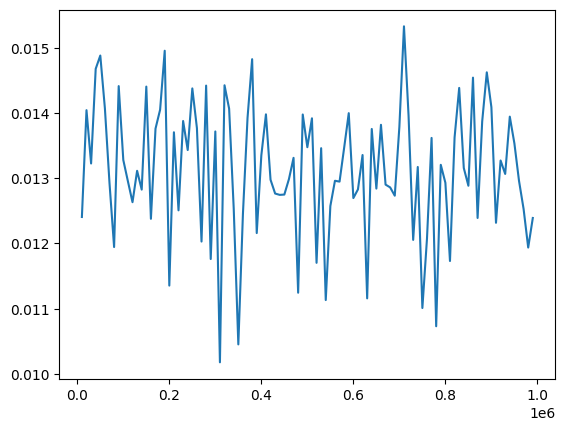

In [4]:
N_vals_compare = 100 # how many values for N to compare
N_max = 1e6
N_vals = [round(element * N_max / N_vals_compare) for element in range(1,N_vals_compare)]
number_points = round(1e3) # amount of integration points

num_results_to_average = 100 # how many times to calculate result to calculate convergence error

results = []

for N in N_vals:
    error_sum = 0
    for i in range(0,num_results_to_average):
        area = 4 * integrate_mc(ball_fun, number_points,2)
        error_sum += abs(area - np.pi)
    error = (error_sum / num_results_to_average) / np.pi
    results.append(error)

plt.plot(N_vals, results)
plt.show()

As we can see, the result barely converges as we increase the number of integration points.


- Find the volume of the $n$-dimensional ball and compare to the analytical result

$$ V_d = \frac{\pi^{d/2}}{\Gamma(1 + d/2)} $$

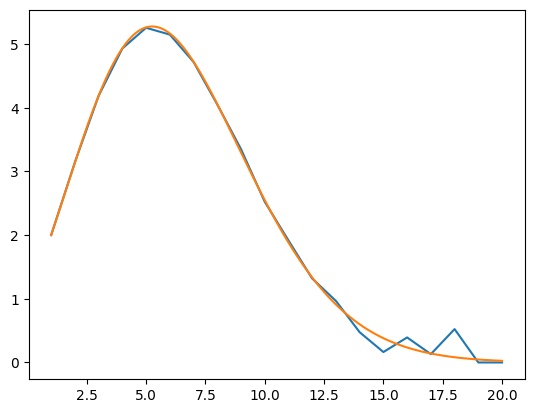

In [5]:
dim_values = range(1,21) # How many spacial dimensions our ball lives in
number_points = round(1e6)
results = []

def soluana(dim):
    return np.power(np.pi, dim/2)/sp.gamma(1 + dim/2)

for dim in dim_values:
    volume = (1 << dim) * integrate_mc(ball_fun, number_points, dim)
    results.append(volume)

# plot results
plt.plot(dim_values, results)

# plot analytical solution
dim_range = np.linspace(1,20,1000)
plt.plot(dim_range, soluana(dim_range))
plt.show()

The graph shows that the MC method yields great results for lower dimensions (roughly $<12$). After that, the Volume of the ball gets so small that the result gets inaccurate. To fix this, we could try more integration points (but the jupyter kernel kept crashing on me for number_points > 2e6).